In [1]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-12 13:51:42--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.197.184, 52.217.168.144, 52.217.232.144, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.197.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  53.1MB/s    in 10s     

2023-10-12 13:51:53 (55.3 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [2]:
import numpy as np
import random
import os
import matplotlib

In [3]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [4]:
x = layers.Conv2D(32, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [5]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [6]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

In [7]:
output = layers.Dense(1,activation='sigmoid')(x)

In [8]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [9]:
from tensorflow.keras.optimizers import RMSprop
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.001),metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [11]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"


response = requests.get(url)


with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)

with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [12]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [13]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=60,validation_data=validation_dataset, validation_steps=50, verbose=2)

<ipython-input-13-b4dfdff29129>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=60,validation_data=validation_dataset, validation_steps=50, verbose=2)


Epoch 1/60
100/100 - 178s - loss: 0.8021 - acc: 0.5505 - val_loss: 0.6658 - val_acc: 0.6300 - 178s/epoch - 2s/step
Epoch 2/60
100/100 - 173s - loss: 0.6662 - acc: 0.6080 - val_loss: 0.6679 - val_acc: 0.6180 - 173s/epoch - 2s/step
Epoch 3/60
100/100 - 166s - loss: 0.6192 - acc: 0.6660 - val_loss: 0.7854 - val_acc: 0.5040 - 166s/epoch - 2s/step
Epoch 4/60
100/100 - 183s - loss: 0.5941 - acc: 0.6880 - val_loss: 0.5814 - val_acc: 0.7040 - 183s/epoch - 2s/step
Epoch 5/60
100/100 - 171s - loss: 0.5695 - acc: 0.7040 - val_loss: 0.5611 - val_acc: 0.6980 - 171s/epoch - 2s/step
Epoch 6/60
100/100 - 172s - loss: 0.5609 - acc: 0.7200 - val_loss: 0.5801 - val_acc: 0.6960 - 172s/epoch - 2s/step
Epoch 7/60
100/100 - 181s - loss: 0.5219 - acc: 0.7375 - val_loss: 0.5556 - val_acc: 0.7130 - 181s/epoch - 2s/step
Epoch 8/60
100/100 - 172s - loss: 0.5177 - acc: 0.7510 - val_loss: 0.5455 - val_acc: 0.7320 - 172s/epoch - 2s/step
Epoch 9/60
100/100 - 177s - loss: 0.5051 - acc: 0.7560 - val_loss: 0.8246 - val_

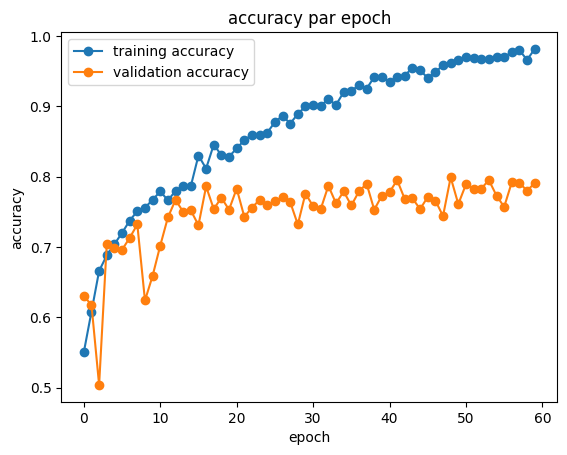

In [14]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


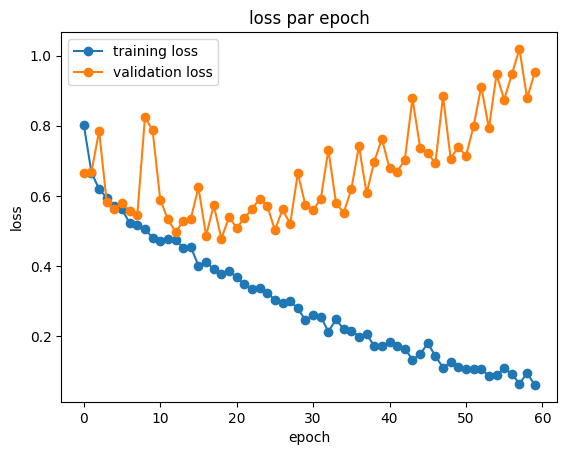

In [15]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [16]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 38s 302ms/step
Nombre de chats : [1181]Nombre de chiens : [1319]


In [17]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 42s 335ms/step
Nombre de chats : [1320]Nombre de chiens : [1180]


125/125 [==============================] - 38s 305ms/step


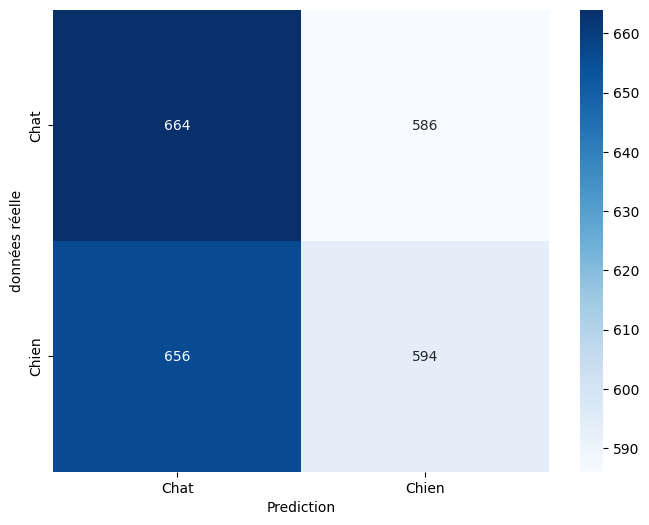

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = my_model.predict(validation_dataset)

binary_predictions = (predictions > 0.8).astype(int)


true_labels = validation_dataset.classes


cm = confusion_matrix(true_labels, binary_predictions)


class_names = ['Chat', 'Chien']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('données réelle')
plt.show()
